In [1]:
#Importing packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [40]:
#Importing iris dataset and setting seed
random.seed(10)
iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  #columns= iris['feature_names'] + ['flower'])
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [41]:
#Checking data
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
#Fixing the column names
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower']

In [43]:
#Shuffle the data and split it into x and y, standardising x since KNN is sensitive
# to size.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = shuffle(df)
x = df.iloc[:, :-1]
print(x.head())
x = pd.DataFrame(scaler.fit_transform(x))
y = df.iloc[:,-1]
print(x.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
108                6.7               2.5                5.8               1.8
47                 4.6               3.2                1.4               0.2
52                 6.9               3.1                4.9               1.5
114                5.8               2.8                5.1               2.4
106                4.9               2.5                4.5               1.7
          0         1         2         3
0  1.038005 -1.281972  1.160819  0.790591
1 -1.506521  0.337848 -1.341272 -1.312977
2  1.280340  0.106445  0.649027  0.396172
3 -0.052506 -0.587764  0.762759  1.579429
4 -1.143017 -1.281972  0.421564  0.659118


In [44]:
#Now we split our data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2)

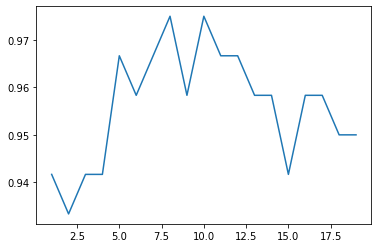

In [47]:
k_vals = np.arange(1, 20)
validation_error = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=5)
                for k in k_vals]
plt.plot(k_vals, [val.mean() for val in validation_error])

In [51]:
y_test

118     Iris-virginica
41         Iris-setosa
146     Iris-virginica
87     Iris-versicolor
15         Iris-setosa
109     Iris-virginica
72     Iris-versicolor
140     Iris-virginica
88     Iris-versicolor
11         Iris-setosa
111     Iris-virginica
50     Iris-versicolor
69     Iris-versicolor
99     Iris-versicolor
105     Iris-virginica
24         Iris-setosa
0          Iris-setosa
1          Iris-setosa
93     Iris-versicolor
133     Iris-virginica
7          Iris-setosa
101     Iris-virginica
48         Iris-setosa
92     Iris-versicolor
47         Iris-setosa
31         Iris-setosa
102     Iris-virginica
96     Iris-versicolor
129     Iris-virginica
144     Iris-virginica
Name: flower, dtype: object

In [53]:
#We see that k=8 has the highest score while being as simple as possible.
#Our test error is then
model = KNeighborsClassifier(n_neighbors=8)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

In [ ]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

k_vals = np.arange(1, 21)
validation_error = []
random.seed(10)
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    
    
    # We will plot the decision boundary in the space of
    # sepal length and petal length. We will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    model.fit(x_train[["petal length (cm)", "petal width (cm)"]], y_train)
    
    h = .02 #step size in mesh
    plot_x = np.array(x_train["petal length (cm)"])
    plot_y = np.array(x_train["petal width (cm)"])
    x_min, x_max = float(plot_x.min() - 1), float(plot_x.max() + 1)
    y_min, y_max = float(plot_y.min() - 1), float(plot_y.max() + 1)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(plot_x, plot_y, c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (k))
    plt.show()